# A Tour of pyGAM

https://pygam.readthedocs.io/en/latest/notebooks/tour_of_pygam.html

In [103]:
# import packages and data

import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits import mplot3d
from pygam import ExpectileGAM
from pygam import f
from pygam import GAM
from pygam import LinearGAM
from pygam import LogisticGAM
from pygam import PoissonGAM
from pygam import s
from pygam import te
from pygam.datasets import chicago
from pygam.datasets import default
from pygam.datasets import faithful
from pygam.datasets import hepatitis
from pygam.datasets import mcycle
from pygam.datasets import trees
from pygam.datasets import toy_classification
from pygam.datasets import toy_interaction
from pygam.datasets import wage

## Introduction

Generalized Additive Models (GAMs) are smooth semi-parametric models of the form:

`g(E[y|X]) = β0 + f1(X1) + f2(X2, X3) + … + fM(XN)`

where `X.T = [X_1, X_2, ..., X_N]` are independent variables, `y` is the dependent variable, and `g()` is the link function that relates our predictor variables to the expected value of the dependent variable.

The feature functions `f_i()` are built using penalized B splines, which allow us to automatically model non-linear relationships without having to manually try out many different transformations on each variable.

<img src="pygam_basis.webp" width="600">

GAMs extend generalized linear models by allowing non-linear functions of features while maintaining additivity. Since the model is additive, it is easy to examine the effect of each `X_i` on `Y` individually while holding all other predictors constant.

The result is a very flexible model, where it is easy to incorporate prior knowledge and control overfitting.

## Generalized Additive Models, in general

`y ∼ ExponentialFamily(μ|X)`

where

`g(μ|X) = β0 + f1(X1) + f2(X2, X3) + … + fM(XN)`

So we can see that a GAM has 3 components:

- distribution from the exponential family

- link function: `g(⋅)`

- functional form with an additive structure: `β0 + f1(X1) + f2(X2, X3) + … + fM(XN)`

### Distribution:

Specified via: `GAM(distribution='...')`

Currently you can choose from the following:

- `'normal'`

- `'binomial'`

- `'poisson'`

- `'gamma'`

- `'inv_gauss'`

### Link function:

We specify this using: `GAM(link='...')`

Link functions take the distribution mean to the linear prediction. So far, the following are available:

- `'identity'`

- `'logit'`

- `'inverse'`

- `'log'`

- `'inverse-squared'`

### Functional Form:

Speficied in `GAM(terms=...)` or more simply `GAM(...)`

In pyGAM, we specify the functional form using terms:

- `l()` linear terms: for terms like Xi

- `s()` spline terms

- `f()` factor terms

- `te()` tensor products

- `intercept`

With these, we can quickly and compactly build models like:

In [104]:
# from pygam import GAM, s, te

GAM(s(0, n_splines=200) + te(3, 1) + s(2), distribution='poisson', link='log')

GAM(callbacks=['deviance', 'diffs'], distribution='poisson', 
   fit_intercept=True, link='log', max_iter=100, 
   terms=s(0) + te(3, 1) + s(2), tol=0.0001, verbose=False)

which specifies that we want a:

- spline function on feature 0, with 200 basis functions

- tensor spline interaction on features 1 and 3

- spline function on feature 2

Note:

`GAM(..., intercept=True)` so models include an intercept by default.

### in Practice…

In pyGAM you can build custom models by specifying these 3 elements, or you can choose from common models:

- `LinearGAM` identity link and normal distribution

- `LogisticGAM` logit link and binomial distribution

- `PoissonGAM` log link and Poisson distribution

- `GammaGAM` log link and gamma distribution

- `InvGauss` log link and inv_gauss distribution

The benefit of the common models is that they have some extra features, apart from reducing boilerplate code.

## Terms and Interactions

pyGAM can also fit interactions using tensor products via `te()`:

In [105]:
X, y = chicago(return_X_y=True)

gam = PoissonGAM(s(0, n_splines=200) + te(3, 1) + s(2)).fit(X, y)

and plot a 3D surface:

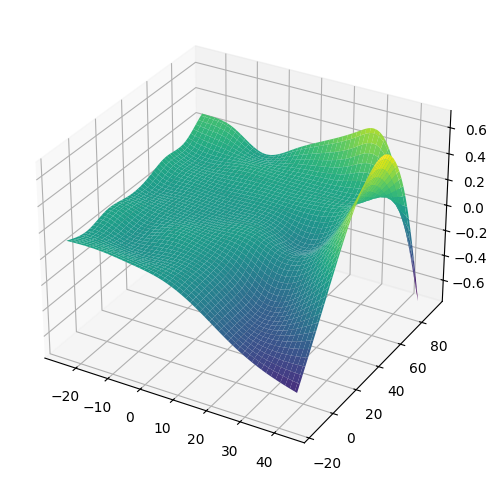

In [106]:
plt.ion()
plt.rcParams['figure.figsize'] = (12, 6)
XX = gam.generate_X_grid(term=1, meshgrid=True)
Z = gam.partial_dependence(term=1, X=XX, meshgrid=True)

ax = plt.axes(projection='3d')
ax.plot_surface(XX[0], XX[1], Z, cmap='viridis')
plt.show()

For simple interactions it is sometimes useful to add a by-variable to a term:

In [107]:
X, y = toy_interaction(return_X_y=True)

gam = LinearGAM(s(0, by=1)).fit(X, y)
gam.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     20.8471
Link Function:                     IdentityLink Log Likelihood:                              -2314315.2641
Number of Samples:                        50000 AIC:                                          4628674.2223
                                                AICc:                                         4628674.2423
                                                GCV:                                                  0.01
                                                Scale:                                                0.01
                                                Pseudo R-Squared:                                   0.9976
Feature Function                  Lam

/var/folders/0c/wp1qw1z126v3ks75ls3g3zt80000gn/T/ipykernel_34088/2319862468.py:4: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()


## Regression

For regression problems, we can use a linear GAM which models:

`E[y|X] = β0 + f1(X1) + f2(X2, X3) + ⋯ + fM(XN)`

In [108]:
X, y = wage(return_X_y=True)

  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--


  9% (1 of 11) |##                       | Elapsed Time: 0:00:00 ETA:   0:00:08
 18% (2 of 11) |####                     | Elapsed Time: 0:00:01 ETA:   0:00:04
 36% (4 of 11) |#########                | Elapsed Time: 0:00:01 ETA:   0:00:03
 54% (6 of 11) |#############            | Elapsed Time: 0:00:01 ETA:   0:00:01
 63% (7 of 11) |###############          | Elapsed Time: 0:00:01 ETA:   0:00:00
 72% (8 of 11) |##################       | Elapsed Time: 0:00:01 ETA:   0:00:00
 90% (10 of 11) |#####################   | Elapsed Time: 0:00:01 ETA:   0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:01 Time:  0:00:01


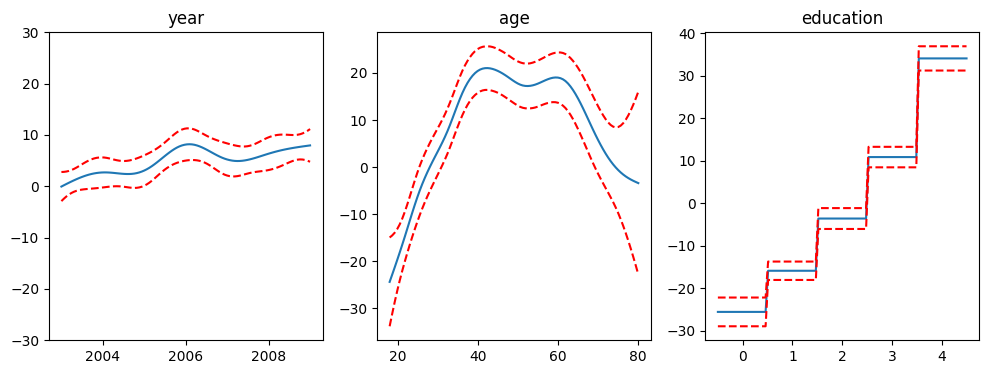

In [109]:
# model
gam = LinearGAM(s(0) + s(1) + f(2))
gam.gridsearch(X, y)

# plotting
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

titles = ['year', 'age', 'education']
for i, ax in enumerate(axs):
    XX = gam.generate_X_grid(term=i)
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
    if i == 0:
        ax.set_ylim(-30, 30)
    ax.set_title(titles[i])

Even though our model allows coefficients, our smoothing penalty reduces us to just 19 effective degrees of freedom:

In [110]:
gam.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     19.2602
Link Function:                     IdentityLink Log Likelihood:                                -24116.7451
Number of Samples:                         3000 AIC:                                            48274.0107
                                                AICc:                                           48274.2999
                                                GCV:                                             1250.3656
                                                Scale:                                           1235.9245
                                                Pseudo R-Squared:                                   0.2945
Feature Function                  Lam

/var/folders/0c/wp1qw1z126v3ks75ls3g3zt80000gn/T/ipykernel_34088/3358381670.py:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()


With LinearGAMs, we can also check the prediction intervals:

In [111]:
X, y = mcycle(return_X_y=True)

  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
 90% (10 of 11) |#####################   | Elapsed Time: 0:00:00 ETA:  00:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


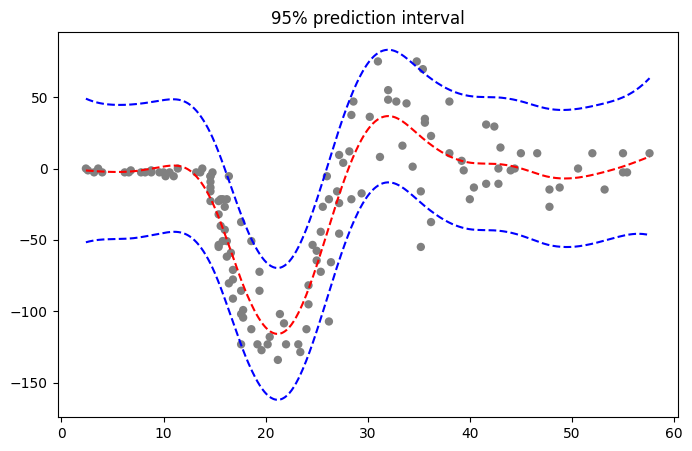

In [112]:
X, y = mcycle(return_X_y=True)

gam = LinearGAM(n_splines=25).gridsearch(X, y)
XX = gam.generate_X_grid(term=0, n=500)

plt.figure(figsize=(8, 5))

plt.plot(XX, gam.predict(XX), 'r--')
plt.plot(XX, gam.prediction_intervals(XX, width=.95), color='b', ls='--')
plt.scatter(X, y, facecolor='gray', edgecolors='none')
plt.title('95% prediction interval')
plt.show()

And simulate from the posterior:

  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
 90% (10 of 11) |#####################   | Elapsed Time: 0:00:00 ETA:  00:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


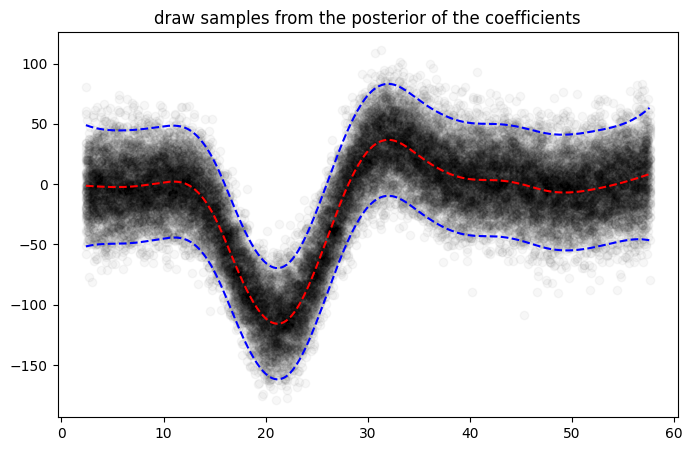

In [113]:
# continuing last example with the mcycle dataset

plt.figure(figsize=(8, 5))

for response in gam.sample(X, y, quantity='y', n_draws=50, sample_at_X=XX):
    plt.scatter(XX, response, alpha=.03, color='k')

plt.plot(XX, gam.predict(XX), 'r--')
plt.plot(XX, gam.prediction_intervals(XX, width=.95), color='b', ls='--')
plt.title('draw samples from the posterior of the coefficients')
plt.show()

## Classification

For binary classification problems, we can use a logistic GAM which models:

`log(P(y=1|X) / P(y=0|X)) = β0 + f1(X1) + f2(X2, X3) + ⋯ + fM(XN)`

  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--


  9% (1 of 11) |##                       | Elapsed Time: 0:00:00 ETA:   0:00:08
 18% (2 of 11) |####                     | Elapsed Time: 0:00:01 ETA:   0:00:05
 27% (3 of 11) |######                   | Elapsed Time: 0:00:01 ETA:   0:00:03
 36% (4 of 11) |#########                | Elapsed Time: 0:00:01 ETA:   0:00:03
 45% (5 of 11) |###########              | Elapsed Time: 0:00:01 ETA:   0:00:02
 54% (6 of 11) |#############            | Elapsed Time: 0:00:02 ETA:   0:00:01
 63% (7 of 11) |###############          | Elapsed Time: 0:00:02 ETA:   0:00:01
 72% (8 of 11) |##################       | Elapsed Time: 0:00:03 ETA:   0:00:01
 81% (9 of 11) |####################     | Elapsed Time: 0:00:03 ETA:   0:00:00
 90% (10 of 11) |#####################   | Elapsed Time: 0:00:03 ETA:   0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:03 Time:  0:00:03


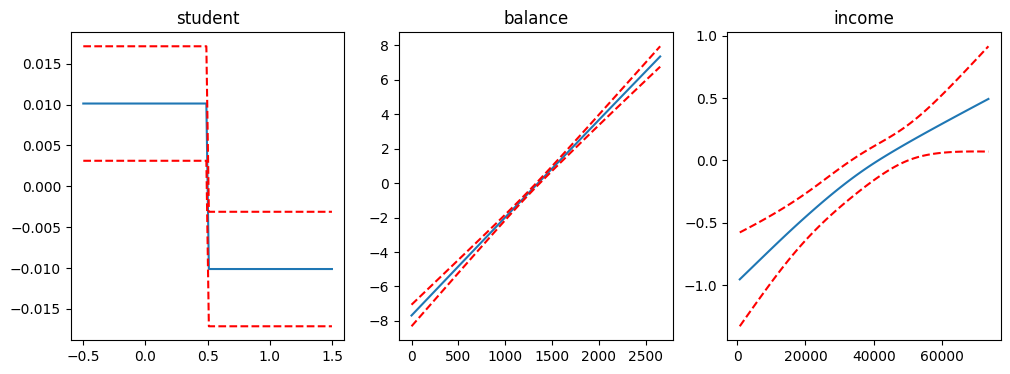

In [114]:
X, y = default(return_X_y=True)

gam = LogisticGAM(f(0) + s(1) + s(2)).gridsearch(X, y)

fig, axs = plt.subplots(1, 3, figsize=(12, 4))
titles = ['student', 'balance', 'income']

for i, ax in enumerate(axs):
    XX = gam.generate_X_grid(term=i)
    pdep, confi = gam.partial_dependence(term=i, width=.95)
    ax.plot(XX[:, i], pdep)
    ax.plot(XX[:, i], confi, c='r', ls='--')
    ax.set_title(titles[i])

We can then check the accuracy:

In [115]:
gam.accuracy(X, y)  # 0.9739

0.9739

Since the scale of the Binomial distribution is known, our gridsearch minimizes the Un-Biased Risk Estimator (UBRE) objective:

In [116]:
gam.summary()

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                      3.8047
Link Function:                        LogitLink Log Likelihood:                                   -788.877
Number of Samples:                        10000 AIC:                                             1585.3634
                                                AICc:                                             1585.369
                                                UBRE:                                               2.1588
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.4598
Feature Function                  Lam

/var/folders/0c/wp1qw1z126v3ks75ls3g3zt80000gn/T/ipykernel_34088/3358381670.py:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()


## Poisson and Histogram Smoothing

We can intuitively perform histogram smoothing by modeling the counts in each bin as being distributed Poisson via PoissonGAM.

  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:  00:00:00
 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:00
 90% (10 of 11) |#####################   | Elapsed Time: 0:00:00 ETA:   0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


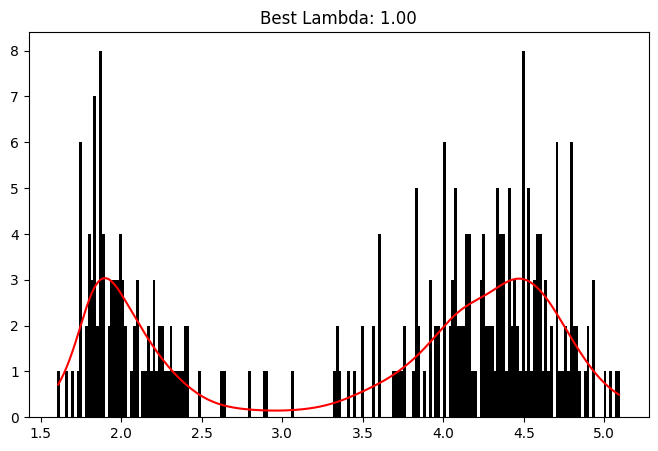

In [117]:
X, y = faithful(return_X_y=True)

gam = PoissonGAM().gridsearch(X, y)

plt.figure(figsize=(8, 5))

plt.hist(faithful(return_X_y=False)['eruptions'], bins=200, color='k')
plt.plot(X, gam.predict(X), color='r')
plt.title('Best Lambda: {0:.2f}'.format(gam.lam[0][0]))
plt.show()

## Expectiles

GAMs with a Normal distribution suffer from the limitation of an assumed constant variance. Sometimes this is not an appropriate assumption, because we’d like the variance of our error distribution to vary.

In this case we can resort to modeling the expectiles of a distribution.

Expectiles are intuitively similar to quantiles, but model tail expectations instead of tail mass. Although they are less interpretable, expectiles are much faster to fit, and can also be used to non-parametrically model a distribution.

In [118]:
X, y = mcycle(return_X_y=True)

# lets fit the mean model first by CV
gam50 = ExpectileGAM(expectile=0.5).gridsearch(X, y)

# and copy the smoothing to the other models
lam = gam50.lam

# now fit a few more models
gam95 = ExpectileGAM(expectile=0.95, lam=lam).fit(X, y)
gam75 = ExpectileGAM(expectile=0.75, lam=lam).fit(X, y)
gam25 = ExpectileGAM(expectile=0.25, lam=lam).fit(X, y)
gam05 = ExpectileGAM(expectile=0.05, lam=lam).fit(X, y)

  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:  00:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


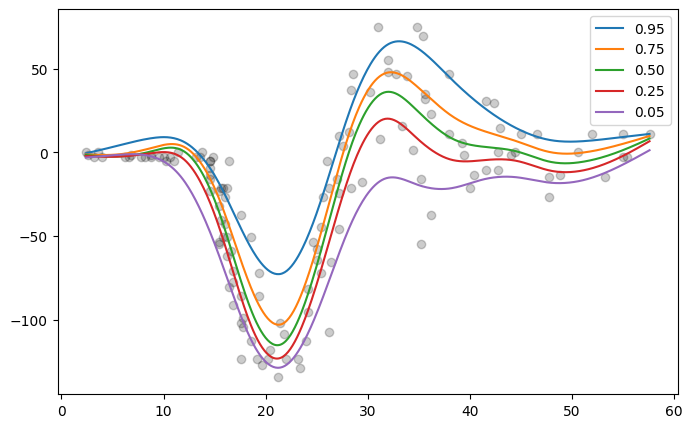

In [119]:
XX = gam50.generate_X_grid(term=0, n=500)

plt.figure(figsize=(8, 5))

plt.scatter(X, y, c='k', alpha=0.2)
plt.plot(XX, gam95.predict(XX), label='0.95')
plt.plot(XX, gam75.predict(XX), label='0.75')
plt.plot(XX, gam50.predict(XX), label='0.50')
plt.plot(XX, gam25.predict(XX), label='0.25')
plt.plot(XX, gam05.predict(XX), label='0.05')
plt.legend()
plt.show()

We fit the mean model by cross-validation in order to find the best smoothing parameter lam and then copy it over to the other models.

This practice makes the expectiles less likely to cross.

## Custom Models

It’s also easy to build custom models by using the base GAM class and specifying the distribution and the link function:

  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:  00:00:00
 54% (6 of 11) |#############            | Elapsed Time: 0:00:00 ETA:   0:00:00
 81% (9 of 11) |####################     | Elapsed Time: 0:00:00 ETA:   0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


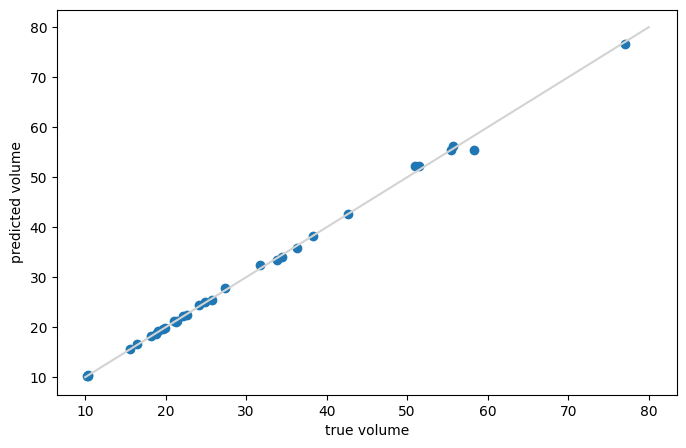

In [120]:
X, y = trees(return_X_y=True)

gam = GAM(distribution='gamma', link='log')
gam.gridsearch(X, y)

plt.figure(figsize=(8, 5))

plt.scatter(y, gam.predict(X))
plt.xlabel('true volume')
plt.ylabel('predicted volume')
plt.plot([10.0, 80.0], [10.0, 80.0], color="lightgray")  # added
plt.show()

We can check the quality of the fit by looking at the Pseudo R-Squared:

In [121]:
gam.summary()

GAM                                                                                                       
=============================================== ==========================================================
Distribution:                         GammaDist Effective DoF:                                     25.3616
Link Function:                          LogLink Log Likelihood:                                   -26.1673
Number of Samples:                           31 AIC:                                              105.0579
                                                AICc:                                             501.5549
                                                GCV:                                                0.0088
                                                Scale:                                               0.001
                                                Pseudo R-Squared:                                   0.9993
Feature Function                  Lam

/var/folders/0c/wp1qw1z126v3ks75ls3g3zt80000gn/T/ipykernel_34088/3358381670.py:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()


## Penalties / Constraints

With GAMs we can encode prior knowledge and control overfitting by using penalties and constraints.

- Available penalties - second derivative smoothing (default on numerical features) - L2 smoothing (default on categorical features)

- Availabe constraints - monotonic increasing/decreasing smoothing - convex/concave smoothing - periodic smoothing (soon…)

We can inject our intuition into our model by using monotonic and concave constraints:

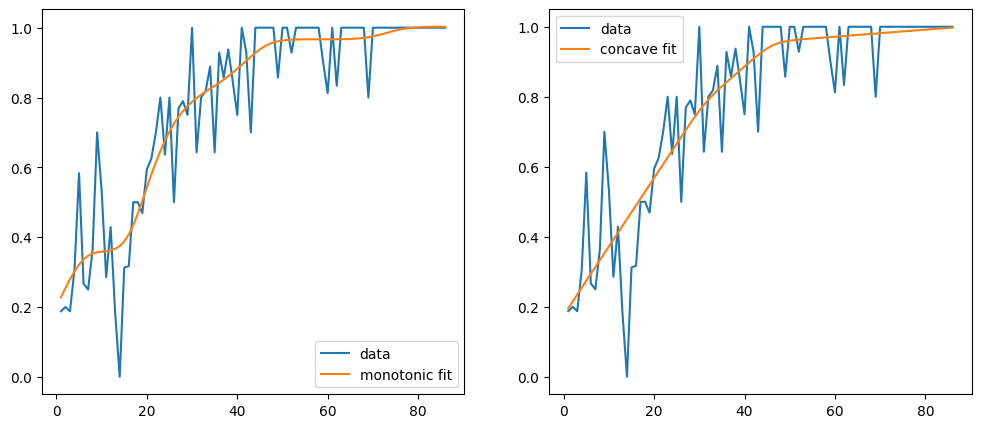

In [122]:
X, y = hepatitis(return_X_y=True)

gam1 = LinearGAM(s(0, constraints='monotonic_inc')).fit(X, y)
gam2 = LinearGAM(s(0, constraints='concave')).fit(X, y)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].plot(X, y, label='data')
ax[0].plot(X, gam1.predict(X), label='monotonic fit')
ax[0].legend()
ax[1].plot(X, y, label='data')
ax[1].plot(X, gam2.predict(X), label='concave fit')
ax[1].legend()
plt.show()

## API

pyGAM is intuitive, modular, and adheres to a familiar API:

In [123]:
X, y = toy_classification(return_X_y=True, n=5000)

gam = LogisticGAM(s(0) + s(1) + s(2) + s(3) + s(4) + f(5))
gam.fit(X, y)

LogisticGAM(callbacks=[Deviance(), Diffs(), Accuracy()], 
   fit_intercept=True, max_iter=100, 
   terms=s(0) + s(1) + s(2) + s(3) + s(4) + f(5) + intercept, 
   tol=0.0001, verbose=False)

Since GAMs are additive, it is also super easy to visualize each individual feature function, `f_i(X_i)`. These feature functions describe the effect of each `X_i` on `y` individually while marginalizing out all other predictors:

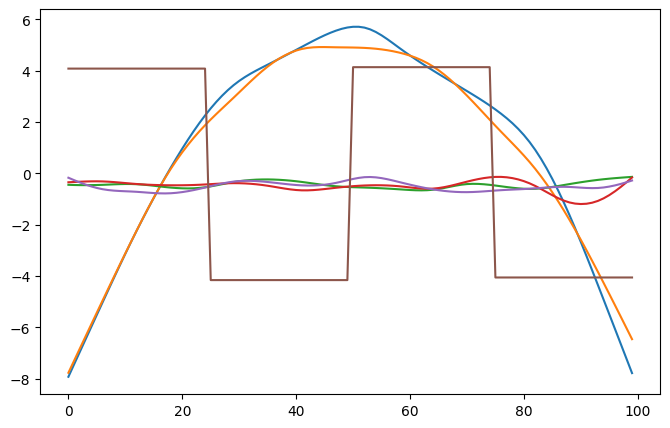

In [124]:
plt.figure(figsize=(8, 5))

for i, term in enumerate(gam.terms):
    if term.isintercept:
        continue
    plt.plot(gam.partial_dependence(term=i))

## Current Features

### Models

pyGAM comes with many models out-of-the-box:

- GAM (base class for constructing custom models)

- LinearGAM

- LogisticGAM

- GammaGAM

- PoissonGAM

- InvGaussGAM

- ExpectileGAM

### Terms

- `l()` linear terms

- `s()` spline terms

- `f()` factor terms

- `te()` tensor products

- `intercept`

### Distributions

- Normal

- Binomial

- Gamma

- Poisson

- Inverse Gaussian

### Link Functions

Link functions take the distribution mean to the linear prediction. These are the canonical link functions for the above distributions:

- Identity

- Logit

- Inverse

- Log

- Inverse-squared

### Callbacks

Callbacks are performed during each optimization iteration. It’s also easy to write your own.

- deviance - model deviance

- diffs - differences of coefficient norm

- accuracy - model accuracy for LogisticGAM

- coef - coefficient logging

You can check a callback by inspecting:

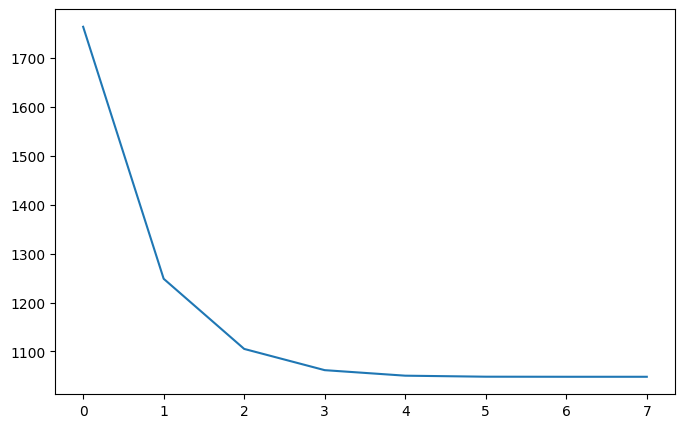

In [125]:
plt.figure(figsize=(8, 5))
plt.plot(gam.logs_['deviance'])
plt.show()

### Linear Extrapolation

  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


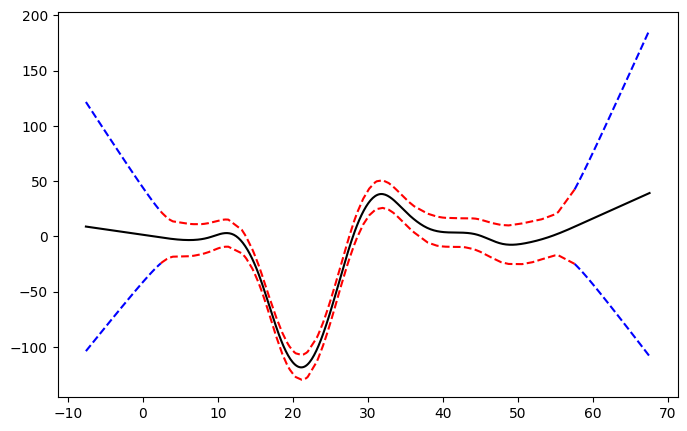

In [126]:
X, y = mcycle()

gam = LinearGAM()
gam.gridsearch(X, y)

XX = gam.generate_X_grid(term=0)

m = X.min()
M = X.max()
XX = np.linspace(m - 10, M + 10, 500)
Xl = np.linspace(m - 10, m, 50)
Xr = np.linspace(M, M + 10, 50)

plt.figure(figsize=(8, 5))

plt.plot(XX, gam.predict(XX), 'k')
plt.plot(Xl, gam.confidence_intervals(Xl), color='b', ls='--')
plt.plot(Xr, gam.confidence_intervals(Xr), color='b', ls='--')
plt.plot(X, gam.confidence_intervals(X), color='r', ls='--')
plt.show()

## References

- Simon N. Wood, 2006, *Generalized Additive Models: an introduction with R*  

- Hastie, Tibshirani, Friedman, *The Elements of Statistical Learning*
    + http://statweb.stanford.edu/~tibs/ElemStatLearn/printings/ESLII_print10.pdf

- James, Witten, Hastie and Tibshirani, *An Introduction to Statistical Learning*
    + http://www-bcf.usc.edu/~gareth/ISL/ISLR%20Sixth%20Printing.pdf

- Paul Eilers & Brian Marx, 1996, *Flexible Smoothing with B-splines and Penalties*
    + http://www.stat.washington.edu/courses/stat527/s13/readings/EilersMarx_StatSci_1996.pdf

- Kim Larsen, 2015, "GAM: The Predictive Modeling Silver Bullet"
    + http://multithreaded.stitchfix.com/assets/files/gam.pdf

- Deva Ramanan, 2008, "UCI Machine Learning: Notes on IRLS"
    + http://www.ics.uci.edu/~dramanan/teaching/ics273a_winter08/homework/irls_notes.pdf

- Paul Eilers & Brian Marx, 2015, "International Biometric Society: A Crash Course on P-splines"
    + http://www.ibschannel2015.nl/project/userfiles/Crash_course_handout.pdf

- Keiding, Niels, 1991, *Age-specific incidence and prevalence: a statistical perspective*